In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

/Users/canoe/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 加载并预处理数据

In [2]:
# 加载训练集数据
data_paths = {
    "经济": "经济train.csv",
    "军事": "军事train.csv",
    "科技": "科技train.csv",
    "社会": "社会train.csv",
    "体育": "体育train.csv",
    "文化": "文化train.csv",
    "政治": "政治train.csv"
}

In [3]:
df_list = []
for label, path in data_paths.items():
    df = pd.read_csv(path)
    df['Area'] = label  # 添加类别标签列
    df_list.append(df)

In [4]:
# 合并所有数据
df = pd.concat(df_list, ignore_index=True)

In [5]:
# 查看数据概况
print(df.head())

  Area               KeyWords             Name Verified Language  \
0   经济  high-speed rail china  XIE Yongjun 解勇军        f       en   
1   经济  high-speed rail china  XIE Yongjun 解勇军        f       en   
2   经济  high-speed rail china  XIE Yongjun 解勇军        f       en   
3   经济  high-speed rail china  XIE Yongjun 解勇军        f       en   
4   经济  high-speed rail china  XIE Yongjun 解勇军        f       en   

                                           Content Unnamed: 6 Unnamed: 7  \
0  High-speed rail here and there in China (37/46)        NaN        NaN   
1  High-speed rail here and there in China (36/46)        NaN        NaN   
2  High-speed rail here and there in China (35/46)        NaN        NaN   
3  High-speed rail here and there in China (34/46)        NaN        NaN   
4  High-speed rail here and there in China (33/46)        NaN        NaN   

  Unnamed: 8 Unnamed: 9  ... Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18  \
0        NaN        NaN  ...         NaN         NaN  

# 文本预处理与特征提取

In [6]:
# 查看是否存在缺失值
print(df.isnull().sum())

# 删除包含缺失值的行
df = df.dropna(subset=['Content'])

# 如果你想填充缺失值（例如，填充空字符串），可以使用下面的方法
# df['Content'] = df['Content'].fillna('')

Area               0
KeyWords           0
Name             460
Verified           5
Language           1
Content            1
Unnamed: 6     53845
Unnamed: 7     70169
Unnamed: 8     76185
Unnamed: 9     78201
Unnamed: 10    78911
Unnamed: 11    79215
Unnamed: 12    79336
Unnamed: 13    79402
Unnamed: 14    79436
Unnamed: 15    79451
Unnamed: 16    79462
Unnamed: 17    79464
Unnamed: 18    79467
Unnamed: 19    79468
Unnamed: 20    79469
Unnamed: 21    79469
Unnamed: 22    79470
Unnamed: 23    79470
Unnamed: 24    79470
dtype: int64


In [7]:
# 确保所有内容列都是字符串类型
df['Content'] = df['Content'].astype(str)

In [8]:
# 将文本数据转化为TF-IDF特征
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # 限制最多5000个特征
X = vectorizer.fit_transform(df['Content']).toarray()

In [9]:
# 标签编码，将文本标签（Area）转化为数字
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Area'])

In [10]:
# 拆分数据集为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练XGBoost模型

In [11]:
# 初始化XGBoost模型
model = XGBClassifier(eval_metric="mlogloss", use_label_encoder=False)

In [12]:
# 训练模型
model.fit(X_train, y_train)

/Users/canoe/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:05:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

# 模型评估

In [13]:
# 对验证集进行预测
y_pred = model.predict(X_val)

In [14]:
# 计算各类评估指标
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

In [15]:
# 打印评估结果
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8830
Precision: 0.8954
Recall: 0.8830
F1 Score: 0.8823


In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

In [17]:
# 模拟一些数据
n_classes = 7  # 假设有3个类别
y_true = np.random.randint(0, n_classes, 100)  # 真实标签
y_prob = np.random.rand(100, n_classes)  # 假设是预测的概率

In [18]:
# 计算ROC曲线
fpr = {}
tpr = {}
roc_auc = {}

In [19]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_true == i, y_prob[:, i])

In [20]:
# 绘制ROC曲线
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [21]:
handles = []  # 用来存放图例句柄
labels = []  # 用来存放图例标签

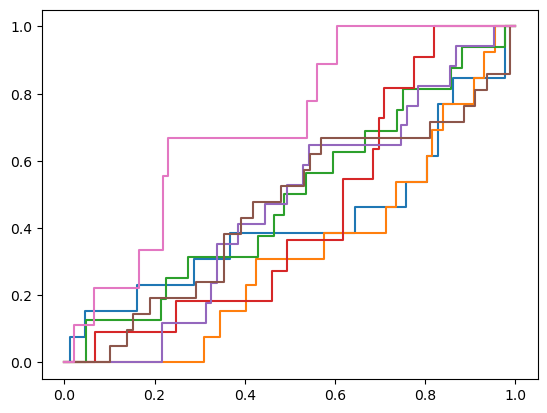

In [22]:
# 绘制每个类别的ROC曲线
for i in range(n_classes):
    line, = plt.plot(fpr[i], tpr[i], label=f'Class {i} AUC = {roc_auc[i]:.2f}')
    handles.append(line)
    labels.append(f'Class {i} AUC = {roc_auc[i]:.2f}')

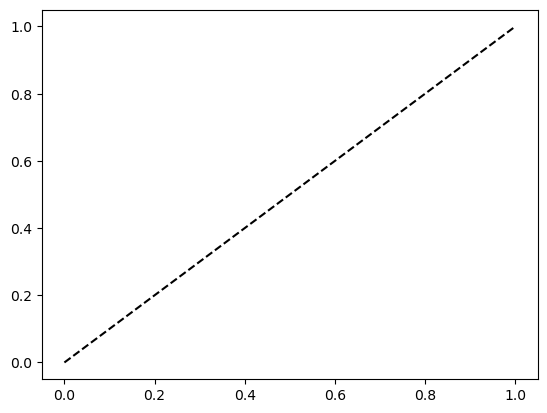

In [23]:
# 绘制对角线（随机分类器的曲线）
line, = plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
handles.append(line)
labels.append('Random Classifier')

Text(0.5, 1.0, 'ROC Curve for Multi-Class Classification')

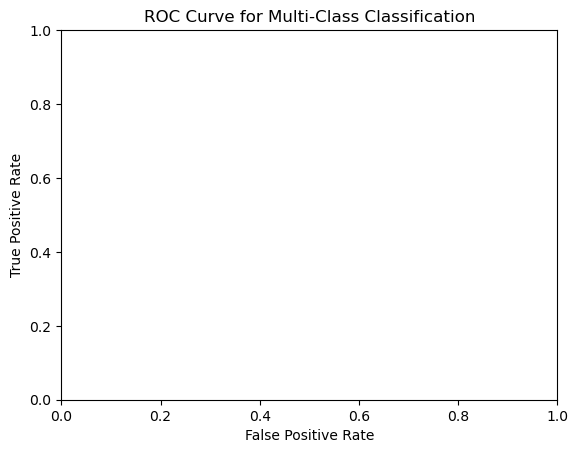

In [24]:
# 设置图形的标题和标签
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')

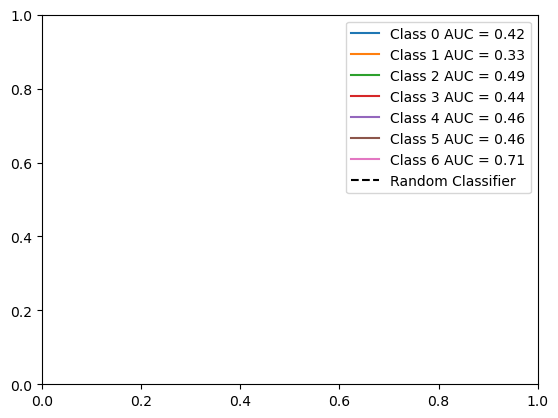

In [25]:
# 显式传递图例句柄和标签
plt.legend(handles=handles, labels=labels, loc='best')

In [26]:
# 在 Jupyter Notebook 中启用图形显示
%matplotlib inline

In [27]:
# 显示图形
plt.show()

In [28]:
# 加载预测集数据
# 读取文件时打印出读取的行数
with open('predict.txt', 'r') as file:
    lines = file.readlines()
    print(f"Total lines in file: {len(lines)}")
    for i, line in enumerate(lines):
        print(f"Line {i}: {line}")

Total lines in file: 459
Line 0: Area,KeyWords,Name,Verified,Language,Content

Line 1:  经济,high-speed rail china,Cata Paul,t,en, China's High Speed Rail Evolution Courtesy of @Civixplorer

Line 2:  经济,express delivery china,Mem #CaffeCinos,f,en,This guy use to be the delivery driver for China express on William barefoot 

Line 3:  经济,high-speed rail china,Dean Baker,f,en,I believe China has more high-speed rail than the rest of the world combined

Line 4:  经济,high-speed rail china,Слава Україні!!,f,en,China's high-speed rail crew

Line 5:  经济,high-speed rail china,China Perspective,t,en,High-Speed Rail Station in the Mountains  #China

Line 6:  经济,China trade ,JabroniCoin.USD,f,en,Looks like the China trade has teppered off

Line 7:  经济,high-speed rail china,Tent manufacturer ~ Wang Wenda,f,en,China's high-speed rail ranks first in the world

Line 8:  经济,high-speed rail china,sriramnat,f,en,China Sees More Stations Shut Down as High-Speed Rail Debt Crisis Deepens

Line 9:  经济,made in c

In [29]:
# 加载预测集数据
predict_df = pd.read_csv('predict.txt', header=None, names=['Content'], on_bad_lines='skip')

In [30]:
# 提取预测文本特征
X_predict = vectorizer.transform(predict_df['Content']).toarray()

In [31]:
# 进行预测
y_predict = model.predict(X_predict)

In [32]:
# 将预测结果转化为类别名称
predicted_labels = label_encoder.inverse_transform(y_predict)

In [33]:
# 输出预测结果
predict_df['Predicted Area'] = predicted_labels
print(predict_df[['Content', 'Predicted Area']].head())

                                                                                                         Content  \
Area KeyWords               Name            Verified Language                                            Content   
 经济  high-speed rail china  Cata Paul       t        en         China's High Speed Rail Evolution Courtesy of...   
     express delivery china Mem #CaffeCinos f        en        This guy use to be the delivery driver for Chi...   
     high-speed rail china  Dean Baker      f        en        I believe China has more high-speed rail than ...   
                            Слава Україні!! f        en                             China's high-speed rail crew   

                                                              Predicted Area  
Area KeyWords               Name            Verified Language             文化  
 经济  high-speed rail china  Cata Paul       t        en                   经济  
     express delivery china Mem #CaffeCinos f        en           